# Implementacion del Filtrado

En este notebook aprenderás como utilizar el filtrado y crearás un filtro Gaussiano.

Irving Vasquez
@juan1rving

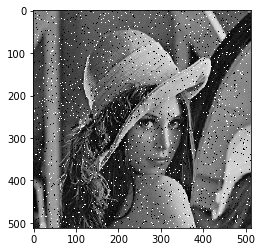

In [2]:
# paquetes necesarios
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy.stats import multivariate_normal
%matplotlib inline

# Leer la imagen con ruido de sal y pimienta
lenna_sp = mpimg.imread('lenna_sp.png')

# Desplegar información y graficar la imagen
#print('Esta imagen es de tipo:', type(imagen), 'con dimensiones:', imagen.shape)
plt.imshow(lenna_sp, cmap = 'gray') 



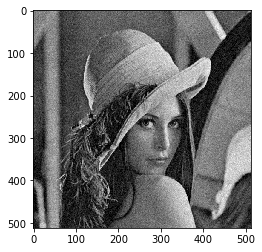

In [3]:
# Ahora mostraremos una imagen con ruido gaussiano
lenna_gn = mpimg.imread('lenna_gn.png')
plt.imshow(lenna_gn, cmap = 'gray') 

## Filtrado

En este primer ejemplo utilizaremos un filtro 'media' o 'promedio' y realizaremos la convolución entre la imagen y el filtro.

Filtro media:
\begin{equation}
\begin{array}{|c|c|c|}
			\hline
			\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ 
			\hline
			\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ 
			\hline
			\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
			\hline
\end{array}
\end{equation}

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


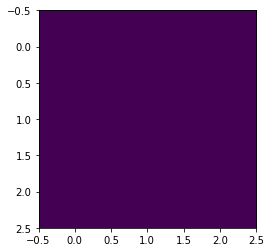

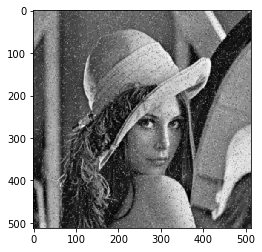

In [4]:
# Definir kernel (filtro)
k = 1
tamano = 2 * k + 1
kernel = np.ones((tamano, tamano), np.float32) /(tamano**2)

print(kernel)
# imprimir el filtro
plt.imshow(kernel)
plt.show()

# Operación de convolución 2D entre el filtro y la imagen
img_filtrada = cv2.filter2D(lenna_sp,-1,kernel)

#imprimir la magen convolucionada
plt.imshow(img_filtrada, cmap='gray')

In [ ]:
# Ejercicio: 
# 1. Aplica el filtro de media a la imagen con ruido gaussiano
# 2. Genera un kernel gaussiano
# 3. Modifica los valores del filtro y observa los resultados


## Kernel Gaussiano

Generaremos un filtro Gaussiano

Ahora aplicaremos el filtro gaussiano de opencv

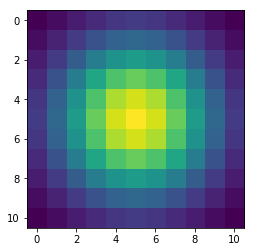

In [6]:
# definir el tamaño del nuevo filtro
k = 5
tamano = 2 * k + 1
kernel_gaussiano = np.ones((tamano, tamano),np.float32)

# Definir los parámetros de la función gaussiana 
mean = [0, 0]
cov = [[8, 0], [0, 8]]  # diagonal covariance

# Para evaluar la función de densidad gaussiana utilizaremos la siguiente función
x = [0, 0]
y = multivariate_normal.pdf(x, mean, cov)

# Ahora rellenamos el kernel
for i in range(tamano):
    for j in range(tamano):
        x = [-k + i, -k + j]
        w = multivariate_normal.pdf(x, mean, cov)
        kernel_gaussiano[i][j] = w

# imprimimos el kernel
plt.imshow(kernel_gaussiano)



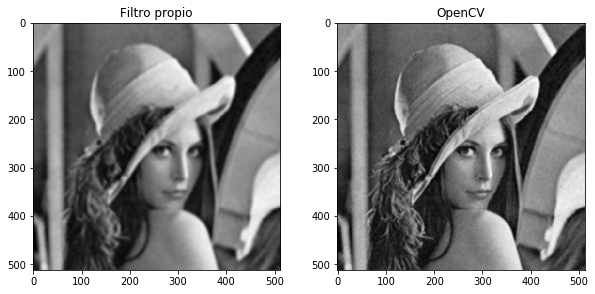

In [7]:
# Operación de convolución 2D entre el filtro y la imagen
img_difuminada = cv2.filter2D(lenna_gn,-1,kernel_gaussiano)

# OpenCV ya tiene implementado un filtro gaussiano
sigma = 5
size = 5
blur = cv2.GaussianBlur(lenna_gn,(5,5),sigma)

# plot with various axes scales
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(img_difuminada, cmap = 'gray')
plt.title('Filtro propio')

plt.subplot(222)
plt.imshow(blur, cmap = 'gray')
plt.title('OpenCV')

plt.show()

Al parecer no estamos obteniendo los mismos resultados.

Puedes modificar el filtro para obtener resultados similares?